In [1]:
import numpy as np

schema:

doc2vec.ipynb: store doc_topic_vec, labels_df used in 

undersampling.ipynb: store input and df used in 

cnn_gridsearch

\\------

test_preprocessing_ipynb store tagged_docs and test_set used in 

test_preprocessing_part2 store: X_test, y_test used in

cnn_evaluation.ipynb and simple_nn_evaluation.ipynb


Evaluation on the best CNN on the test set

In [2]:
%store -r X_train
%store -r y_train
%store -r X_val
%store -r y_val

#these are all stored from the notebook cnn_gridsearch.ipynb, to make sure that training and parameter tuning are implemented on the exact same data

In [17]:
%store -r X_test

#stored from the notebook test_preprocessing_part2.ipynb

In [18]:
%store -r y_test

#stored from the notebook test_preprocessing_part2.ipynb

In [19]:
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [20]:
y_test=y_test.to_numpy()
y_test=np.array(y_test.tolist())

In [21]:
print(X_train.shape)
print(y_train.shape)

(2216, 1, 219)
(2216, 4)


In [22]:
print(X_val.shape)
print(y_val.shape)

(554, 1, 219)
(554, 4)


In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [14]:
model = Sequential()


model.add(Dense(256, activation='relu', input_shape=(1,219,)))
model.add(Dense(128, activation='relu'))
model.add(Flatten())


## Convolutional layers
#model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(1, 219)))
#model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
#model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
#model.add(GlobalMaxPooling1D())

# Dense layers
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.7))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.7))

# Output layer with 6 units for classification
model.add(Dense(4, activation='softmax'))

# Create an optimizer with an initial learning rate
optimizer = Adam(learning_rate=0.0001)

# Use ReduceLROnPlateau callback to adjust learning rate during training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1, 256)            56320     
                                                                 
 dense_6 (Dense)             (None, 1, 128)            32896     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 89732 (350.52 KB)
Trainable params: 89732 (350.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20
70/70 [==============================] - 1s 7ms/step - loss: 1.3740 - accuracy: 0.3195 - val_loss: 1.3552 - val_accuracy: 0.3339
Epoch 2/20
70/70 [==============================] - 0s 5ms/step - loss: 1.3554 - accuracy: 0.3583 - val_loss: 1.3482 - val_accuracy: 0.3394
Epoch 3/20
70/70 [==============================] - 0s 5ms/step - loss: 1.3487 - accuracy: 0.3908 - val_loss: 1.3439 - val_accuracy: 0.3682
Epoch 4/20
70/70 [==============================] - 0s 5ms/step - loss: 1.3451 - accuracy: 0.3876 - val_loss: 1.3497 - val_accuracy: 0.3863
Epoch 5/20
70/70 [==============================] - 0s 5ms/step - loss: 1.3429 - accuracy: 0.3998 - val_loss: 1.3447 - val_accuracy: 0.3863
Epoch 6/20
70/70 [==============================] - 0s 6ms/step - loss: 1.3385 - accuracy: 0.4188 - val_loss: 1.3465 - val_accuracy: 0.3755
Epoch 7/20
70/70 [==============================] - 0s 5ms/step - loss: 1.3361 - accuracy: 0.4156 - val_loss: 1.3487 - val_accuracy: 0.3755
Epoch 8/20
70/70 [==

50/50 [==============================] - 0s 3ms/step - loss: 1.5409 - accuracy: 0.2246
Test Loss: 1.5409
Test Accuracy: 0.2246


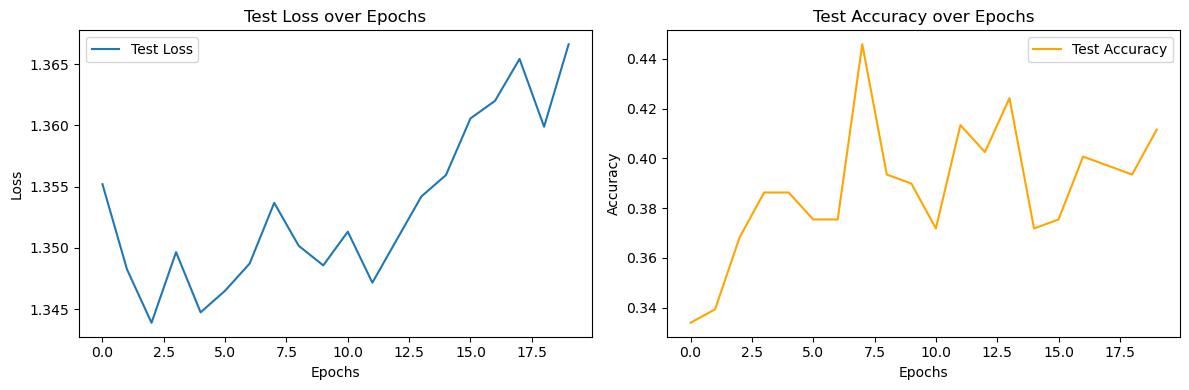

In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=1)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the test loss and test accuracy over epochs
plt.figure(figsize=(12, 4))

# Plot test loss
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Test Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


